# Symplifying multilinear polynomials

This is a coding problem taken from the website *codewars.com*. <br /> <br />*Difficulty: 4 kyu ("orange-green belt")* <br /> <br />
**Description:**

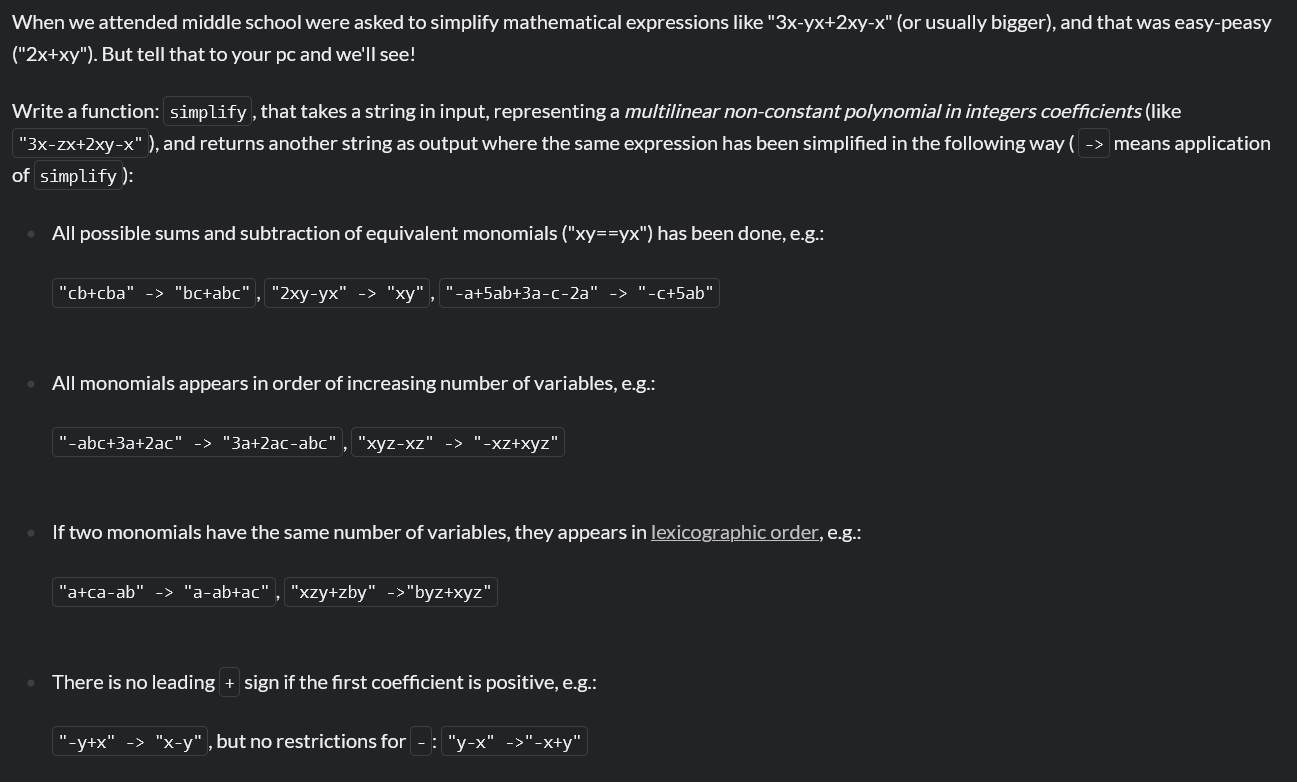

In [2]:
def simplify(poly):
    
    # Split string into elements seperated by "+". "-" is transformed into "+ (-1)*"
    poly=poly.replace("-","+-").split("+") 
    
    # Remove empty elements
    poly=[x for x in poly if len(x)>0]
    
    # Sort every element alphabetically
    poly=["".join(sorted(x)) for x in poly]
    
    # Create two arrays: one with only letters, one without letters
    poly_only_letters=["".join([character for character in word if character.isalpha()]) \
                      for word in poly]
    poly_without_letters=["".join([character for character in word if not character.isalpha()]) \
                      for word in poly]
    
    # Generate a coefficient for every element, so for example "xy" becomes "1*xy"
    # This way "2xy - xy" can be easily calculated
    for i in range(len(poly_without_letters)):
        if poly_without_letters[i]=="": poly_without_letters[i]="1"
        if poly_without_letters[i]=="-": poly_without_letters[i]="-1"
    
    # Sum up coefficients of same variables using dictionary
    poly_dict={}
    for i in range(len(poly_without_letters)):
        if poly_only_letters[i] in poly_dict: # Check if a term with the same variable is already in the dictionary
            poly_dict[poly_only_letters[i]]+=int(poly_without_letters[i])
            if poly_dict[poly_only_letters[i]] == 0: del poly_dict[poly_only_letters[i]]
        else:
            poly_dict[poly_only_letters[i]]=int(poly_without_letters[i])
    
    # Sort elements; first by amount of variables, second alphabetically
    poly=sorted(poly_dict.items(), key=lambda x:(len(x[0]),x[0]))

    # Generate output
    output=""
    for element in poly:
        if element[1]==-1: output+=("-"+element[0])
        elif element[1]==1: output+=("+"+element[0])
        elif element[1]<0: output+=("-"+str(-element[1])+element[0])
        else: output+=("+"+str(element[1])+element[0])

    # Remove a leading "+" if necessary
    if output[0]=="+": output=output[1:]
    
    return output

Let's test this function on a few examples:

In [6]:
for poly in ["2xy-yx","-a+5ab+3a-c-2a","a+ca-ab"]:
  print("Input:",poly,"\nOutput:",simplify(poly),"\n")

Input: 2xy-yx 
Output: xy 

Input: -a+5ab+3a-c-2a 
Output: -c+5ab 

Input: a+ca-ab 
Output: a-ab+ac 



The function also passes all tests on *codewars.com*:
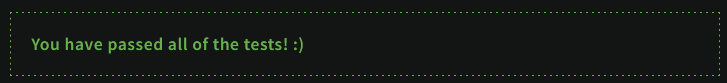